# Linear Regression

In [1]:
import numpy as np

x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1,1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1,1)

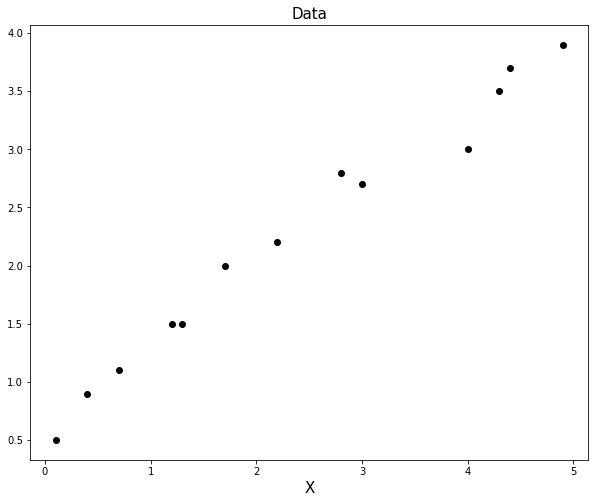

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Data', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.plot(x, y, 'ko')

### Linear Algebra

In [3]:
m = y.shape[0]
A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y

print('theta:\n', theta)

theta:
 [[0.65306531]
 [0.67129519]]


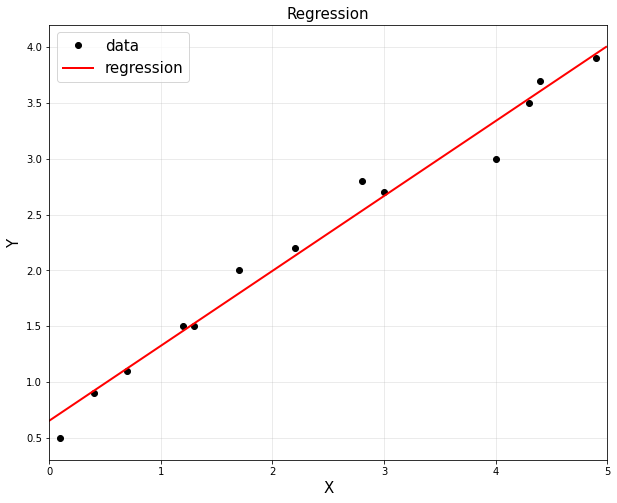

In [6]:
plt.figure(figsize=(10,8))
plt.title('Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x,y,'ko',label="data")

xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp = theta[0,0]+theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth=2, label='regression')
plt.legend(fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.xlim([0,5])
plt.show()

### Gradient Descent

In [8]:
theta = np.random.randn(2,1)
theta = np.asmatrix(theta)

alpha = 0.001

for _ in range(1000):
    df = 2*(A.T*A*theta - A.T*y)
    theta = theta - alpha*df

print(theta)

[[0.65315162]
 [0.67126911]]


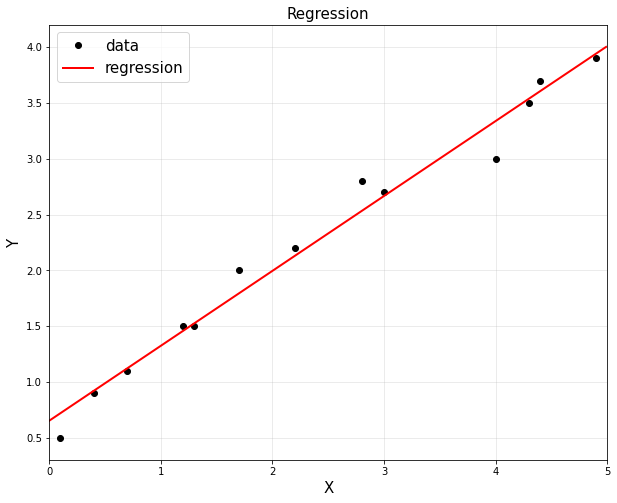

In [9]:
plt.figure(figsize=(10,8))
plt.title('Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x,y,'ko',label="data")

xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp = theta[0,0]+theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth=2, label='regression')
plt.legend(fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.xlim([0,5])
plt.show()

### CVXPY Optimization

In [10]:
import cvxpy as cvx

theta2 = cvx.Variable([2,1])
obj = cvx.Minimize(cvx.norm(A*theta2-y, 2))
cvx.Problem(obj, []).solve()

print('theta:\n', theta2.value)

theta:
 [[0.65306531]
 [0.67129519]]


/home/piai/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


In [11]:
theta1 = cvx.Variable([2,1])
obj = cvx.Minimize(cvx.norm(A*theta1-y, 1))
cvx.Problem(obj).solve()

print('theta:\n', theta1.value)

theta:
 [[0.6258404 ]
 [0.68539899]]


/home/piai/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


In [12]:
x = np.vstack([x, np.array([0.5, 3.8]).reshape(-1,1)])
y = np.vstack([y, np.array([3.9, 0.3]).reshape(-1,1)])

A = np.hstack([x**0, x])
A = np.asmatrix(A)

In [14]:
theta2 = cvx.Variable([2,1])
obj2 = cvx.Minimize(cvx.norm(A*theta2-y, 2))
prob2 = cvx.Problem(obj2).solve()

/home/piai/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 4 times so far.

  warnings.warn(msg, UserWarning)


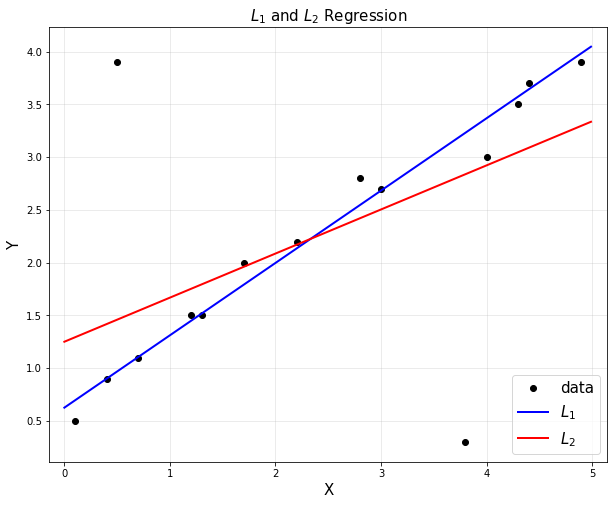

In [15]:
plt.figure(figsize=(10,8))
plt.title('$L_1$ and $L_2$ Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x,y,'ko',label="data")

xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp1 = theta1.value[0,0]+theta1.value[1,0]*xp
yp2 = theta2.value[0,0]+theta2.value[1,0]*xp

plt.plot(xp, yp1, 'b', linewidth=2, label='$L_1$')
plt.plot(xp, yp2, 'r', linewidth=2, label='$L_2$')
plt.legend(fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.xlim([0,5])
plt.show()

### Scikit-Learn:Regression

In [16]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [17]:
reg.coef_

array([[0.41766509]])

In [18]:
reg.intercept_

array([1.25042815])

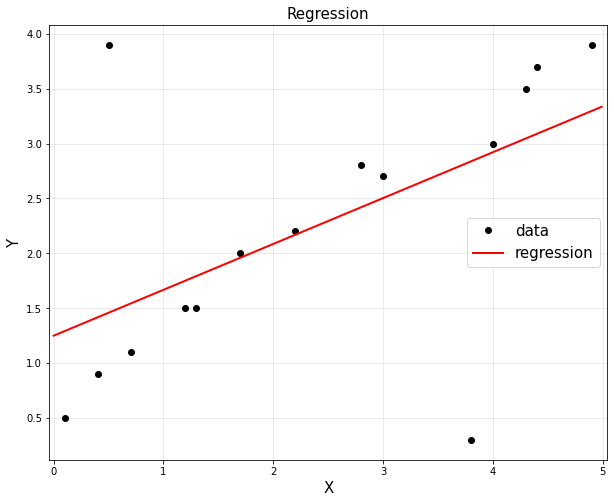

In [19]:
plt.figure(figsize=(10,8))
plt.title('Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x,y,'ko',label="data")

plt.plot(xp, reg.predict(xp), 'r', linewidth=2, label='regression')
plt.legend(fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.xlim([0,5])
plt.show()

# Non-linear Regression

### Polynomial Regression

In [20]:
n = 100
x = -5 + 15*np.random.rand(n,1)
noise = 10*np.random.randn(n,1)

y = 10 + 1*x + 2*x**2 + noise

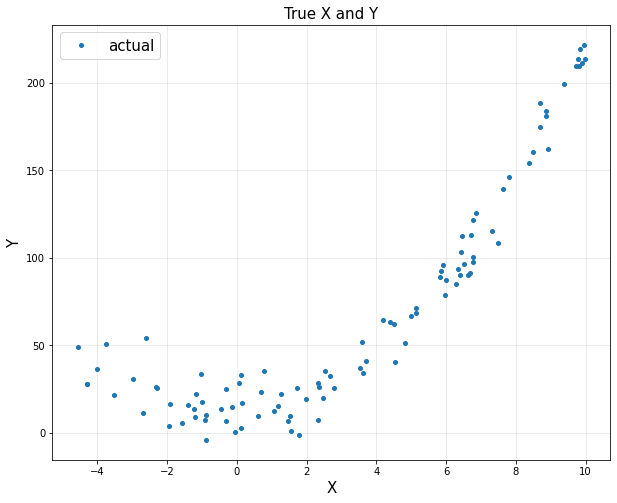

In [24]:
plt.figure(figsize=(10,8))
plt.plot(x, y, 'o', markersize=4, label='actual')

plt.title('True X and Y', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()

In [23]:
A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print('theta:\n', theta)

theta:
 [[11.63764134]
 [ 0.96932732]
 [ 1.97976221]]


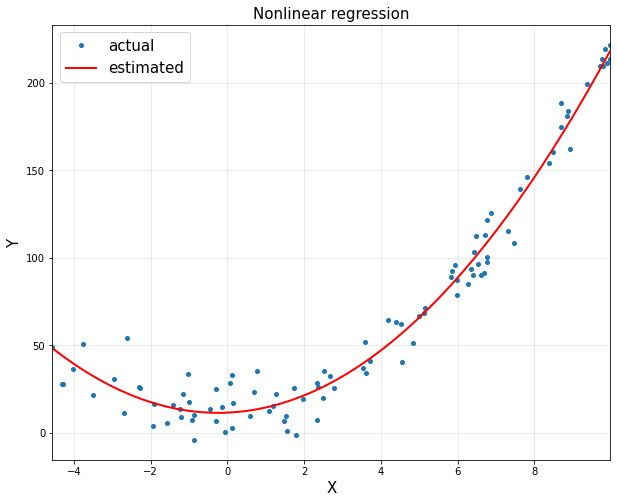

In [28]:
xp = np.linspace(np.min(x), np.max(x))
yp = theta[0,0] + theta[1,0]*xp + theta[2,0]*xp**2

plt.figure(figsize=(10,8))
plt.plot(x, y, 'o', markersize=4, label='actual')
plt.plot(xp, yp, 'r', linewidth=2, label='estimated')

plt.title('Nonlinear regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.xlim([np.min(x), np.max(x)])
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()

## Construct Explicit Feature Vector

### Polynomial Basis

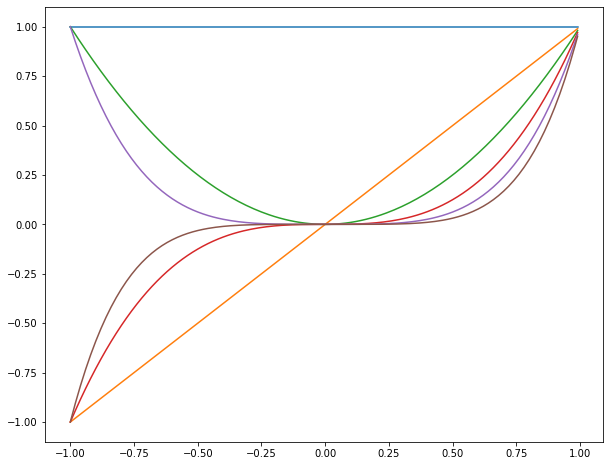

In [31]:
xp = np.arange(-1, 1, 0.01).reshape(-1,1)
polybasis = np.hstack([xp**i for i in range(6)])

plt.figure(figsize=(10,8))

for i in range(6):
    plt.plot(xp, polybasis[:, i], label = '$x^()$.format(i)')

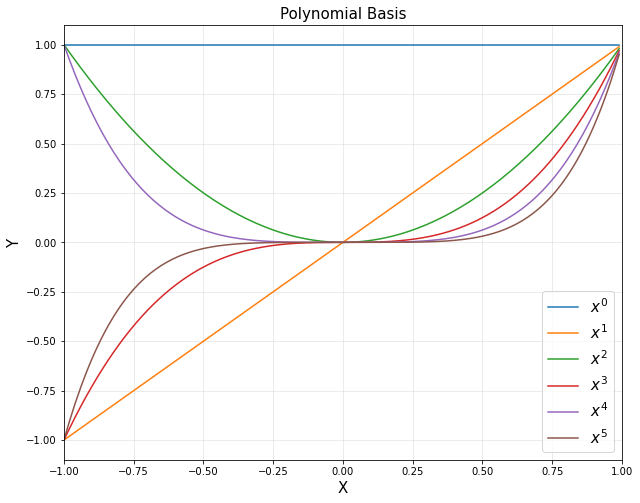

In [35]:
xp = np.arange(-1, 1, 0.01).reshape(-1,1)
polybasis = np.hstack([xp**i for i in range(6)])

plt.figure(figsize=(10,8))

for i in range(6):
    plt.plot(xp, polybasis[:,i], label = '$x^{}$'.format(i))
    
plt.title('Polynomial Basis', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.axis([-1,1,-1.1,1.1])
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()

### RBF Basis

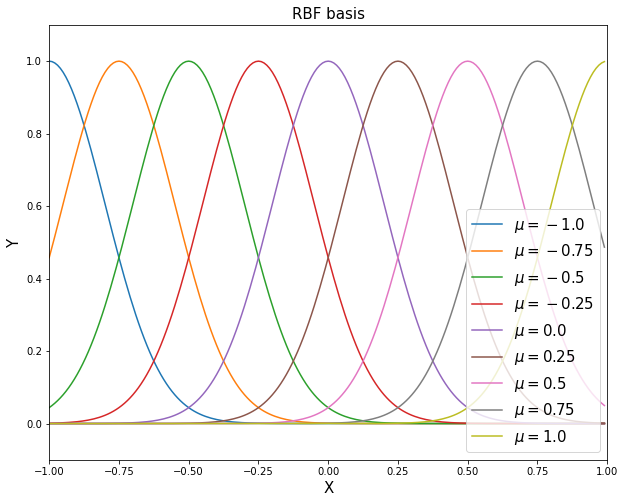

In [39]:
d = 9

u = np.linspace(-1, 1, d)
sigma = 0.2

xp = np.arange(-1, 1, 0.01).reshape(-1,1)
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

plt.figure(figsize=(10,8))

for i in range(d):
    plt.plot(xp, rbfbasis[:,i], label='$\mu = {}$'.format(u[i]))
    
plt.title("RBF basis", fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.axis([-1, 1, -0.1, 1.1])
plt.legend(loc="lower right", fontsize=15)
plt.show()

### Linear Regression with RBF

In [41]:
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = 10
u = np.linspace(-4.5, 4.5, d)
sigma = 0.2

In [42]:
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1,1)

d = 10
u = np.linspace(-4.5, 4.5, d)
sigma = 0.2

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)

theta = (A.T*A).I*A.T*y
yp = rbfbasis*theta

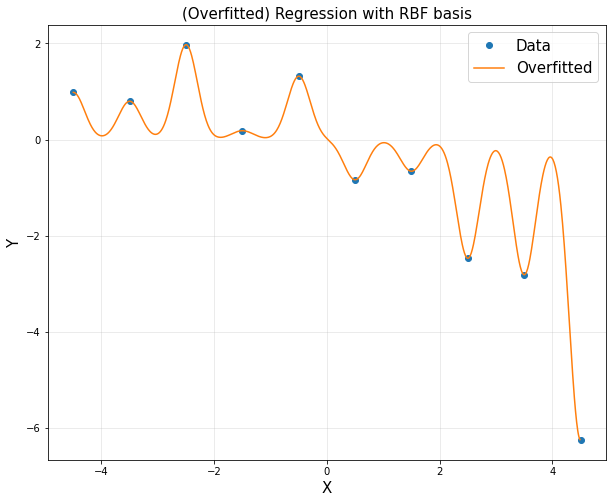

In [43]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'o', label = 'Data')
plt.plot(xp, yp, label = 'Overfitted')
plt.title('(Overfitted) Regression with RBF basis', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()

# Regularization

### With Less Basis Functions: Fewer RBF Centers

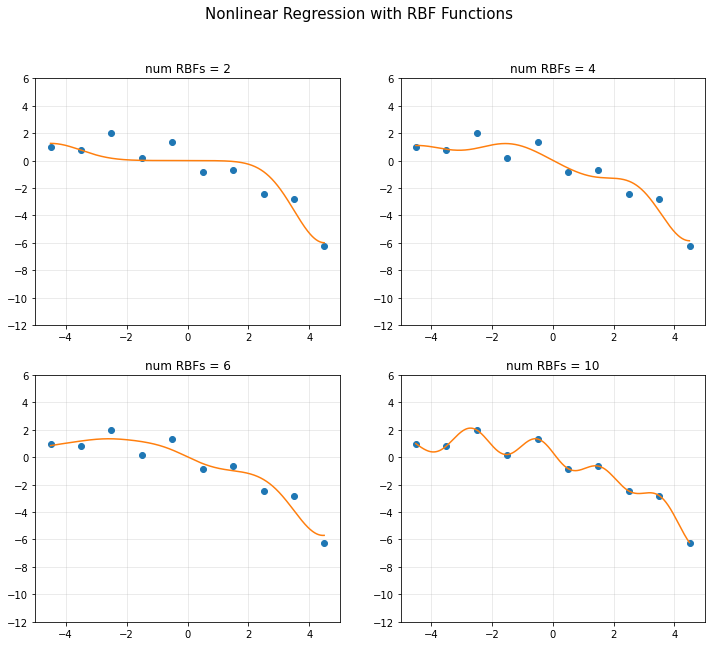

In [46]:
d = [2,4,6,10]
sigma = 1

plt.figure(figsize=(12,10))

for k in range(4):
    u = np.linspace(-4.5, 4.5, d[k])
    
    A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    
    A = np.asmatrix(A)
    rbfbasis = np.asmatrix(rbfbasis)
    
    theta = (A.T*A).I*A.T*y
    yp = rbfbasis*theta
    
    plt.subplot(2, 2, k+1)
    plt.plot(x, y, 'o')
    plt.plot(xp, yp)
    plt.axis([-5, 5, -12, 6])
    plt.title('num RBFs = {}'.format(d[k], fontsize=10))
    plt.grid(alpha=0.3)
    
plt.suptitle('Nonlinear Regression with RBF Functions', fontsize=15)
plt.show()

### RBF with Regularization 1 - 기존 방법 without regularization

/home/piai/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 5 times so far.

  warnings.warn(msg, UserWarning)


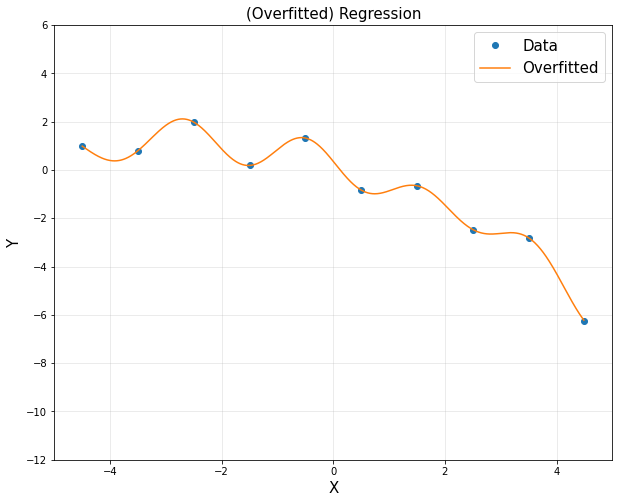

In [48]:
import cvxpy as cvx

d = 10
u = np.linspace(-4.5, 4.5, d)

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)

theta = cvx.Variable([d,1])
obj = cvx.Minimize(cvx.sum_squares(A*theta-y))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Overfitted')
plt.title('(Overfitted) Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

### Ridge Regularization

/home/piai/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 8 times so far.

  warnings.warn(msg, UserWarning)


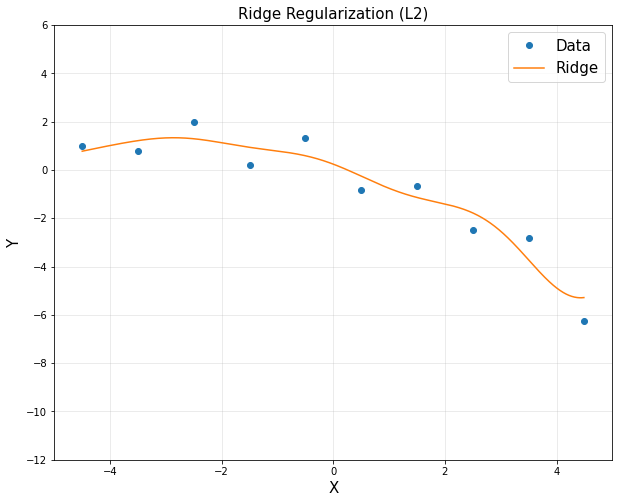

In [51]:
import cvxpy as cvx

d = 10
u = np.linspace(-4.5, 4.5, d)

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)

lamb = 0.1
theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A*theta-y) + lamb*cvx.sum_squares(theta))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Ridge')
plt.title('Ridge Regularization (L2)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

### RBF with Regularization 2 : RBF with LASSO

/home/piai/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 9 times so far.

  warnings.warn(msg, UserWarning)


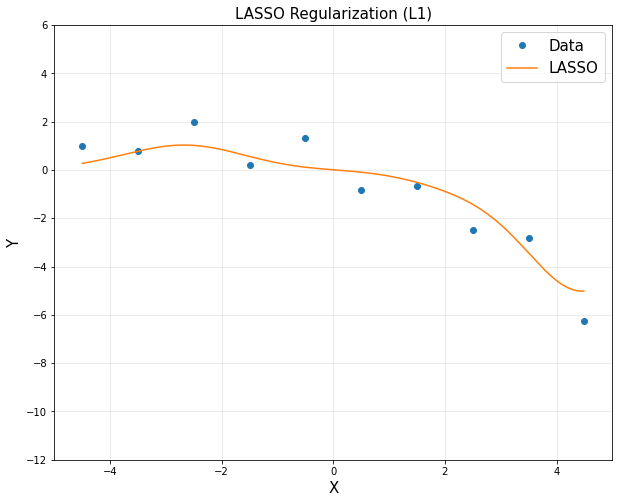

In [52]:
lamb = 2
theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A*theta-y) + lamb*cvx.norm(theta,1))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'LASSO')
plt.title('LASSO Regularization (L1)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

### LASSO vs Ridge

/home/piai/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 12 times so far.

  warnings.warn(msg, UserWarning)
/home/piai/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 13 times so far.

  warnings.warn(msg, UserWarning)


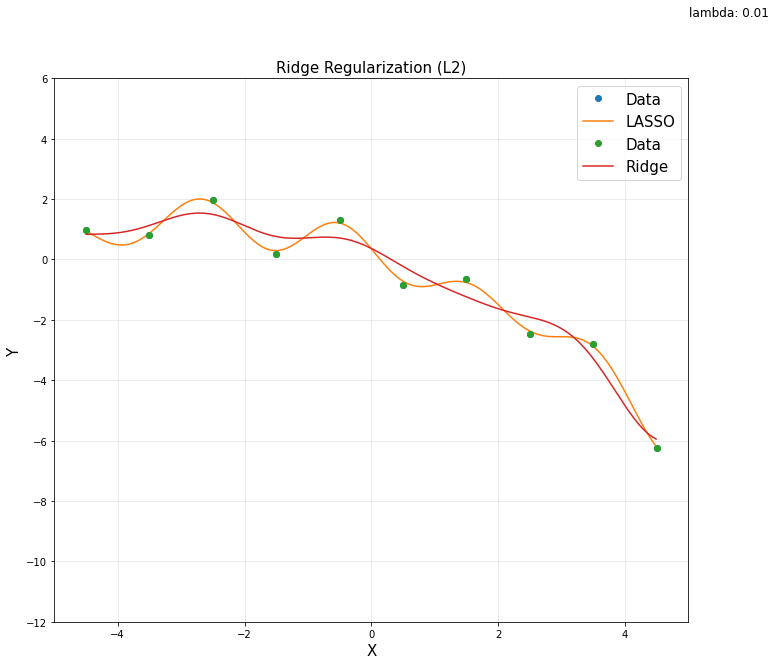

In [54]:
lamb = 0.01
theta1 = cvx.Variable([d,1])
obj1 = cvx.Minimize(cvx.sum_squares(A*theta1 - y) + lamb*cvx.norm(theta1, 1))
prob1 = cvx.Problem(obj1).solve()
yp1 = rbfbasis*theta1.value

theta2 = cvx.Variable([d,1])
obj2 = cvx.Minimize(cvx.sum_squares(A*theta2 - y) + lamb*cvx.sum_squares(theta2))
prob2 = cvx.Problem(obj2).solve()
yp2 = rbfbasis*theta2.value

plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title('LASSO Regularization (L1)', fontsize=15)
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp1, label = 'LASSO')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)

plt.subplot(1,2,1)
plt.title('Ridge Regularization (L2)', fontsize=15)
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp2, label = 'Ridge')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)

plt.suptitle("lambda: {}".format(lamb))
plt.show()

/home/piai/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 15 times so far.

  warnings.warn(msg, UserWarning)


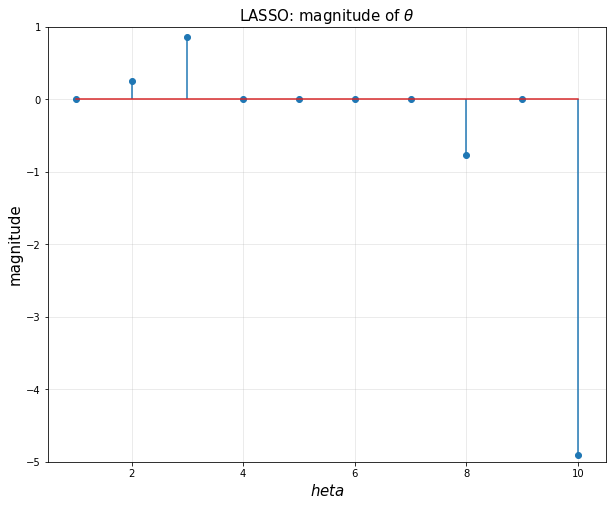

In [56]:
lamb = 2

theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.norm(theta,1))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.title(r'LASSO: magnitude of $\theta$', fontsize = 15)
plt.xlabel('$\theta$', fontsize = 15)
plt.ylabel('magnitude', fontsize = 15)
plt.stem(np.arange(1, 11), theta.value)
plt.xlim([0.5, 10.5])
plt.ylim([-5,1])
plt.grid(alpha=0.3)
plt.show()

# Perceptron Algorithm in Python

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
np.random.seed(42)

m = 100
x1 = 8*np.random.rand(m,1)
x2 = 7*np.random.rand(m,1) - 4

g = 0.8*x1 + x2 - 3

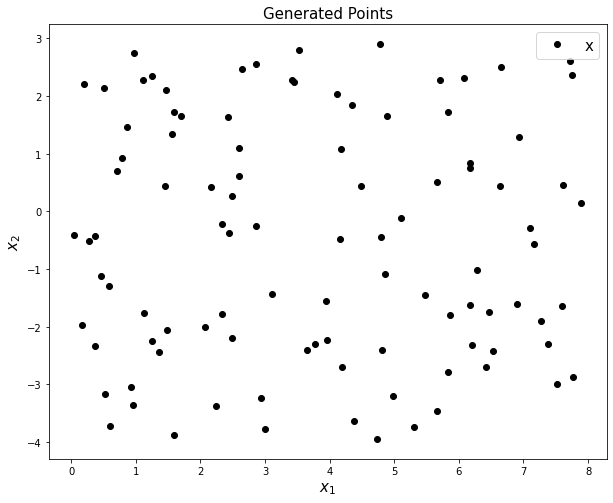

In [84]:
plt.figure(figsize=(10,8))
plt.plot(x1, x2, 'ko', label = 'x')
plt.title('Generated Points', fontsize=15)
plt.legend(loc = 1, fontsize=15)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.show()

In [85]:
C0 = np.where(g<-1)
C1 = np.where(g>=1)
print(C1)

(array([ 1,  7, 12, 18, 20, 25, 27, 33, 34, 39, 50, 53, 54, 62, 65, 69, 70,
       74, 76, 78, 82, 86, 88, 91, 92, 93, 96, 97]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0]))


In [86]:
C1 = np.where(g>=1)[0]
C0 = np.where(g<-1)[0]

print(C1.shape)
print(C0.shape)

(28,)
(40,)


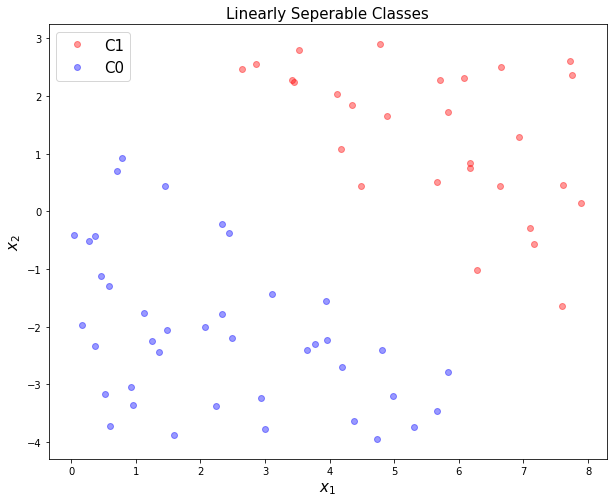

In [87]:
plt.figure(figsize=(10,8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.title('Linearly Seperable Classes', fontsize=15)
plt.legend(loc = 2, fontsize=15)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.show()

In [88]:
w = np.ones([3,1])
w = np.asmatrix(w)

In [89]:
X1 = np.hstack([np.ones([C1.shape[0], 1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([C0.shape[0], 1]), x1[C0], x2[C0]])
X = np.vstack([X1,X0])

In [90]:
y = np.vstack([np.ones([C1.shape[0], 1]), -np.ones([C0.shape[0],1])])

In [91]:
X = np.asmatrix(X)
y = np.asmatrix(y)

In [92]:
n_iter = y.shape[0]
epoch = 10

for k in range(epoch):
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]:
            w += y[i,0]*X[i,:].T
            
    now_loss = 0
    
    for i in range(n_iter):
        now_loss += max(0,-y[i,0] * (X[i,:]*w)[0])
        
    print("iteration: ", k+1, "Loss: ", now_loss)
    
print(w)

iteration:  1 Loss:  [[325.85403761]]
iteration:  2 Loss:  [[253.60306948]]
iteration:  3 Loss:  [[193.71128743]]
iteration:  4 Loss:  [[162.71384086]]
iteration:  5 Loss:  [[138.06956629]]
iteration:  6 Loss:  [[41.7545055]]
iteration:  7 Loss:  [[82.85229033]]
iteration:  8 Loss:  [[5.36774296]]
iteration:  9 Loss:  [[0.23145039]]
iteration:  10 Loss:  0
[[-16.        ]
 [  5.77608119]
 [ 11.93697677]]


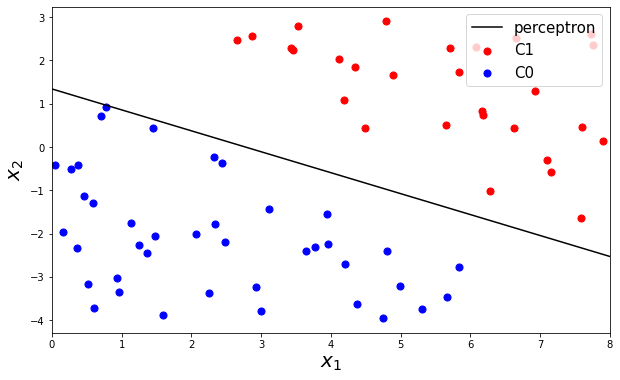

In [93]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = -w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize=(10,6))
plt.scatter(x1[C1], x2[C1], c='r', s=50, label='C1')
plt.scatter(x1[C0], x2[C0], c='b', s=50, label='C0')
plt.plot(x1p, x2p, c='k', label='perceptron')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)
plt.legend(loc = 1, fontsize=15)
plt.show()

In [97]:
X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])
X = np.vstack([X1,X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

In [99]:
from sklearn import linear_model

clf = linear_model.Perceptron(tol=1e-3)
clf.fit(X, np.ravel(y))

Perceptron()

In [100]:
test = [[3,-2],
        [1,5]]

clf.predict(test)

array([-1.,  1.])

In [101]:
clf.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [102]:
clf.coef_

array([[5.28236724, 8.42459245]])

In [103]:
clf.intercept_

array([-14.])

In [104]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

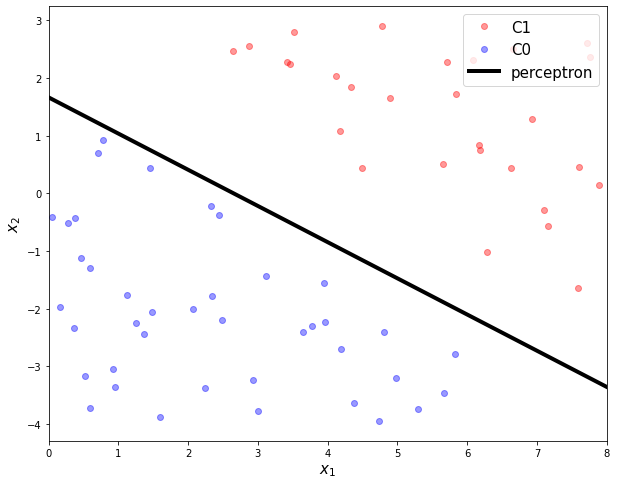

In [106]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = -w1/w2*x1p - w0/w2

plt.figure(figsize=(10,8))
plt.plot(x1[C1], x2[C1], 'ro', alpha=0.4, label='C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha=0.4, label='C0')
plt.plot(x1p, x2p, c='k', linewidth=4, label = 'perceptron')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.legend(loc = 1, fontsize=15)
plt.show()